In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [12]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255

In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

In [5]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))  # input
model.add(Dense(units=128,activation="relu"))     # hidden
model.add(Dense(units=128,activation="relu"))     # hidden
model.add(Dense(units=10,activation="softmax"))   # output
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 1.0622 - accuracy: 0.8502
Epoch 2/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.2725 - accuracy: 0.9241
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1919 - accuracy: 0.9438
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1518 - accuracy: 0.9549
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1252 - accuracy: 0.9620
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1080 - accuracy: 0.9673
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0921 - accuracy: 0.9723
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0819 - accuracy: 0.9748
Epoch 9/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0709 - accuracy: 0.9784
Epoch 10/10
10000/10000 [==============================

In [9]:
model.save("../dataset/models/mnist-model.h5")

In [19]:
def number(n, cd):
    path_file = "../dataset/images/" + cd + "/test_" + str(n) + ".png"
    print(path_file)
    
    img = image.load_img(path=path_file,grayscale=True,target_size=(28,28,1))
    img = image.img_to_array(img)
    
    test_img = img.reshape((1,784))
    
    img_class = model.predict_classes(test_img)

    prediction = img_class[0]
    classname = img_class[0]
    print("Class: ",classname)
    
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.title(classname)
    plt.show()

../dataset/images/var4/test_9.png
Class:  9


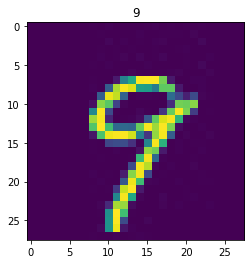

In [20]:
cd = "var4"
number(9, cd)